In [1]:
#all needed imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import folium
import mapclassify

import arcgis 
from arcgis.gis import GIS

#imports for mapping section of code 
import matplotlib
import plotly.express as px
from shapely.geometry import Point

In [2]:
#loading csv file "california fires"
#data source - https://www.kaggle.com/datasets/ananthu017/california-wildfire-incidents-20132020/
df = pd.read_csv(r"C:\Users\alish\Desktop\California_Fire_Incidents.csv") 
print(df)

      AcresBurned  Active                                          AdminUnit  \
0        257314.0   False  Stanislaus National Forest/Yosemite National Park   
1         30274.0   False  USFS Angeles National Forest/Los Angeles Count...   
2         27531.0   False  CAL FIRE Riverside Unit / San Bernardino Natio...   
3         27440.0   False                              Tahoe National Forest   
4         24251.0   False                       Ventura County Fire/CAL FIRE   
...           ...     ...                                                ...   
1631          9.0   False                   CAL FIRE / Riverside County Fire   
1632          2.0   False                  CAL FIRE Nevada-Yuba-Placer Unit    
1633          NaN   False               Yolo County Fire Protection District   
1634          NaN   False                   Camp Pendleton Marine Corps Base   
1635          NaN   False                           Bureau of Indian Affairs   

      AirTankers  ArchiveYear  CalFireI

In [3]:
#cleaning dataset: 
# used relevant methods from https://www.youtube.com/watch?v=bDhvCp3_lYw 
df = df.drop_duplicates()

In [4]:
#removing the coulmns not being used for the quantitative analysis
#location is removed because latitude and longitude are already parameters being mapped so relative location isn't required for now
#all other removed parameters are descriptive and can be important for more qualitative analyses but not relevant immediately 
df = df.drop(columns = ['CanonicalUrl','Location','UniqueId','ConditionStatement','ControlStatement', 'SearchDescription','SearchKeywords']) 
print(df)

      AcresBurned  Active                                          AdminUnit  \
0        257314.0   False  Stanislaus National Forest/Yosemite National Park   
1         30274.0   False  USFS Angeles National Forest/Los Angeles Count...   
2         27531.0   False  CAL FIRE Riverside Unit / San Bernardino Natio...   
3         27440.0   False                              Tahoe National Forest   
4         24251.0   False                       Ventura County Fire/CAL FIRE   
...           ...     ...                                                ...   
1631          9.0   False                   CAL FIRE / Riverside County Fire   
1632          2.0   False                  CAL FIRE Nevada-Yuba-Placer Unit    
1633          NaN   False               Yolo County Fire Protection District   
1634          NaN   False                   Camp Pendleton Marine Corps Base   
1635          NaN   False                           Bureau of Indian Affairs   

      AirTankers  ArchiveYear  CalFireI

In [5]:
#the data type for the Started column is called ISO8601 but it isn't consistent throughout the dataset in terms of length
#to fix that I specified format again, then created a new column based on the start year alone and then isolated the 2019 data using lambda year
#now the dataset has significantly shrunk in terms of rows
df['Started'] = pd.to_datetime(df['Started'], format='ISO8601')
df_2019 = df[df['Started'].dt.year == 2019]
df['Year'] = df['Started'].apply(lambda x: x.year)
df_2019 = df[df['Year'] == 2019]
print(df_2019)

      AcresBurned  Active                                          AdminUnit  \
1370       1806.0   False                     Ventura County Fire Department   
1371       1300.0   False               CAL FIRE Madera-Mariposa-Merced Unit   
1372       1011.0   False  Unified Command: CAL FIRE/Riverside County Fir...   
1373        605.0   False                         CAL FIRE Tehama-Glenn Unit   
1374        494.0   False         CAL FIRE Riverside County Fire Department    
...           ...     ...                                                ...   
1631          9.0   False                   CAL FIRE / Riverside County Fire   
1632          2.0   False                  CAL FIRE Nevada-Yuba-Placer Unit    
1633          NaN   False               Yolo County Fire Protection District   
1634          NaN   False                   Camp Pendleton Marine Corps Base   
1635          NaN   False                           Bureau of Indian Affairs   

      AirTankers  ArchiveYear  CalFireI

In [7]:
print(df_2019.columns)


Index(['AcresBurned', 'Active', 'AdminUnit', 'AirTankers', 'ArchiveYear',
       'CalFireIncident', 'Counties', 'CountyIds', 'CrewsInvolved', 'Dozers',
       'Engines', 'Extinguished', 'Fatalities', 'Featured', 'Final',
       'FuelType', 'Helicopters', 'Injuries', 'Latitude', 'Longitude',
       'MajorIncident', 'Name', 'PercentContained', 'PersonnelInvolved',
       'Public', 'Started', 'Status', 'StructuresDamaged',
       'StructuresDestroyed', 'StructuresEvacuated', 'StructuresThreatened',
       'Updated', 'WaterTenders', 'Year'],
      dtype='object')


In [8]:
df_map = gpd.GeoDataFrame(df_2019,geometry = gpd.points_from_xy(df_2019.Longitude,df_2019.Latitude)) #longitude needs to come before 
df_map #now in the geometry column the latitude and longitude are points 

,AcresBurned,Active,AdminUnit,AirTankers,ArchiveYear,CalFireIncident,Counties,CountyIds,CrewsInvolved,Dozers,...,Started,Status,StructuresDamaged,StructuresDestroyed,StructuresEvacuated,StructuresThreatened,Updated,WaterTenders,Year,geometry
1370,1806.0,False,Ventura County Fire Department,NaN,2019,True,Ventura,56,NaN,NaN,...,2019-10-30 07:45:14+00:00,Finalized,NaN,NaN,NaN,NaN,2019-11-02T19:00:24.44Z,NaN,2019,POINT (-118.80339 34.28218)
1371,1300.0,False,CAL FIRE Madera-Mariposa-Merced Unit,NaN,2019,True,Mariposa,22,NaN,NaN,...,2019-08-16 14:11:02+00:00,Finalized,NaN,NaN,NaN,NaN,2019-10-02T16:07:03.477Z,NaN,2019,POINT (-120.17702 37.53607)
1372,1011.0,False,Unified Command: CAL FIRE/Riverside County Fir...,NaN,2019,True,Riverside,33,10.0,NaN,...,2019-10-10 15:38:44+00:00,Finalized,16.0,74.0,NaN,NaN,2019-11-01T15:14:13.32Z,1.0,2019,POINT (-117.05917 33.99250)
1373,605.0,False,CAL FIRE Tehama-Glenn Unit,NaN,2019,True,Tehama,52,NaN,NaN,...,2019-10-27 02:47:20+00:00,Finalized,NaN,NaN,NaN,NaN,2019-10-28T07:25:39.683Z,NaN,2019,POINT (-122.25421 40.00171)
1374,494.0,False,CAL FIRE Riverside County Fire Department,NaN,2019,True,Riverside,33,5.0,2.0,...,2019-10-30 11:19:00+00:00,Finalized,NaN,NaN,NaN,NaN,2019-11-02T18:52:09.347Z,1.0,2019,POINT (-117.46250 34.01778)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1631,9.0,False,CAL FIRE / Riverside County Fire,NaN,2019,True,Riverside,33,NaN,NaN,...,2019-10-10 12:08:00+00:00,Finalized,NaN,NaN,NaN,NaN,2019-10-10T18:11:59.733Z,NaN,2019,POINT (-117.49962 33.82798)
1632,2.0,False,CAL FIRE Nevada-Yuba-Placer Unit,NaN,2019,True,Nevada,29,NaN,NaN,...,2019-06-28 15:03:04+00:00,Finalized,NaN,NaN,NaN,NaN,2019-06-30T15:52:01.023Z,NaN,2019,POINT (-121.00056 39.40972)
1633,NaN,False,Yolo County Fire Protection District,NaN,2019,False,Yolo,57,NaN,NaN,...,2019-11-25 12:02:02+00:00,Finalized,NaN,NaN,NaN,NaN,2019-12-03T16:35:20.93Z,NaN,2019,POINT (-121.72969 38.73463)
1634,NaN,False,Camp Pendleton Marine Corps Base,NaN,2019,False,San Diego,37,NaN,NaN,...,2019-10-22 19:20:44+00:00,Finalized,NaN,NaN,NaN,NaN,2019-11-21T12:21:28.58Z,NaN,2019,POINT (-117.40372 33.35115)


In [9]:
#plotting points on california to see locations
#fixing crs and 
#https://towardsdatascience.com/geopandas-101-plot-any-data-with-a-latitude-and-longitude-on-a-map-98e01944b972

crs = 'epsg:4326'          #the crs used in the referenced had a deprecation error,fixed now 
geo_map = gpd.GeoDataFrame(df_map, crs=crs, geometry='geometry')
geo_map.head()

,AcresBurned,Active,AdminUnit,AirTankers,ArchiveYear,CalFireIncident,Counties,CountyIds,CrewsInvolved,Dozers,...,Started,Status,StructuresDamaged,StructuresDestroyed,StructuresEvacuated,StructuresThreatened,Updated,WaterTenders,Year,geometry
1370,1806.0,False,Ventura County Fire Department,NaN,2019,True,Ventura,56,NaN,NaN,...,2019-10-30 07:45:14+00:00,Finalized,NaN,NaN,NaN,NaN,2019-11-02T19:00:24.44Z,NaN,2019,POINT (-118.80339 34.28218)
1371,1300.0,False,CAL FIRE Madera-Mariposa-Merced Unit,NaN,2019,True,Mariposa,22,NaN,NaN,...,2019-08-16 14:11:02+00:00,Finalized,NaN,NaN,NaN,NaN,2019-10-02T16:07:03.477Z,NaN,2019,POINT (-120.17702 37.53607)
1372,1011.0,False,Unified Command: CAL FIRE/Riverside County Fir...,NaN,2019,True,Riverside,33,10.0,NaN,...,2019-10-10 15:38:44+00:00,Finalized,16.0,74.0,NaN,NaN,2019-11-01T15:14:13.32Z,1.0,2019,POINT (-117.05917 33.99250)
1373,605.0,False,CAL FIRE Tehama-Glenn Unit,NaN,2019,True,Tehama,52,NaN,NaN,...,2019-10-27 02:47:20+00:00,Finalized,NaN,NaN,NaN,NaN,2019-10-28T07:25:39.683Z,NaN,2019,POINT (-122.25421 40.00171)
1374,494.0,False,CAL FIRE Riverside County Fire Department,NaN,2019,True,Riverside,33,5.0,2.0,...,2019-10-30 11:19:00+00:00,Finalized,NaN,NaN,NaN,NaN,2019-11-02T18:52:09.347Z,1.0,2019,POINT (-117.46250 34.01778)


C:\Users\alish\AppData\Local\Temp\ipykernel_4212\29531187.py:2: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


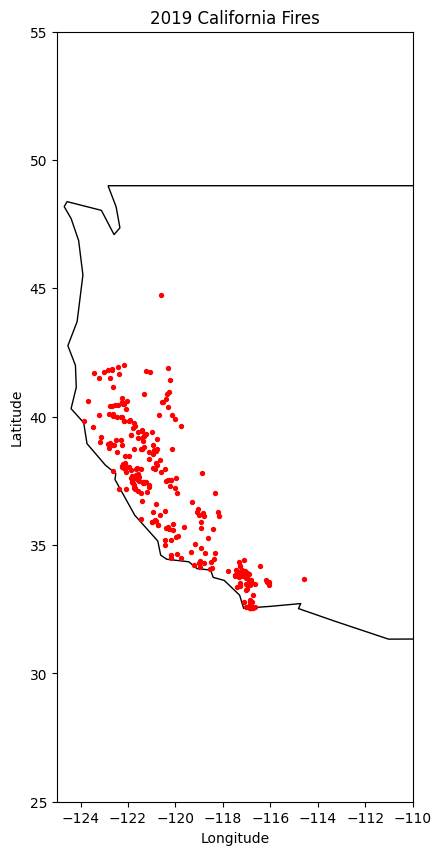

In [10]:

# Load built in dataset - countries
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


california = world[world['name'] == 'United States of America']

# Setup a bounding box for California
california_bbox = (-125, 25, -110, 55)  # the bounds for the map can be adjusted 

# Plot the California map with the specified bounding box
fig, ax = plt.subplots(figsize=(10, 10))
ax.set_xlim(california_bbox[0], california_bbox[2])
ax.set_ylim(california_bbox[1], california_bbox[3])

california.plot(ax=ax, color='white', edgecolor='black')

geo_map.plot(ax=ax, color='red', markersize=8)

ax.set_title('2019 California Fires')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

plt.show()


In [15]:
#Regression to compare both acres burned with personnel involved

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Drop rows with missing values in either 'AcresBurned' or 'PersonnelInvolved'
df = df.dropna(subset=['AcresBurned', 'PersonnelInvolved'])

# Split the data
X = df[['AcresBurned']]
y = df['PersonnelInvolved']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.01, random_state=42)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 74799.6018370183


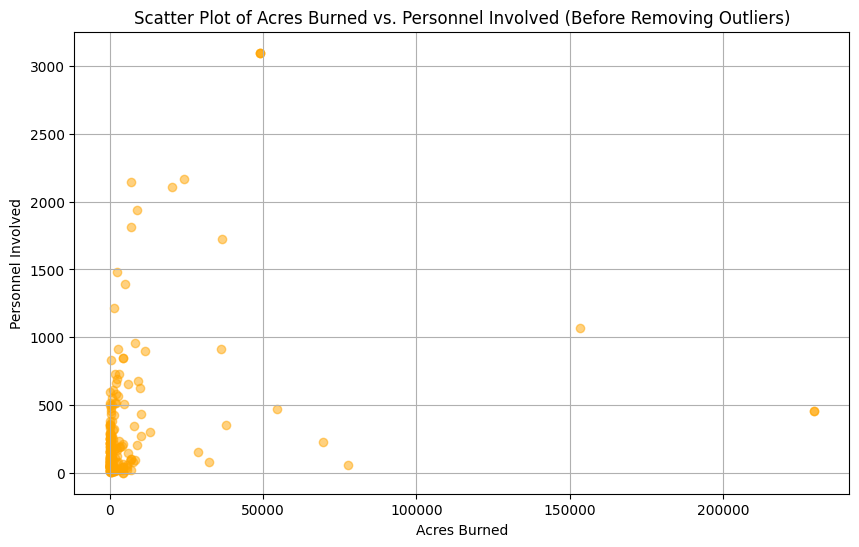

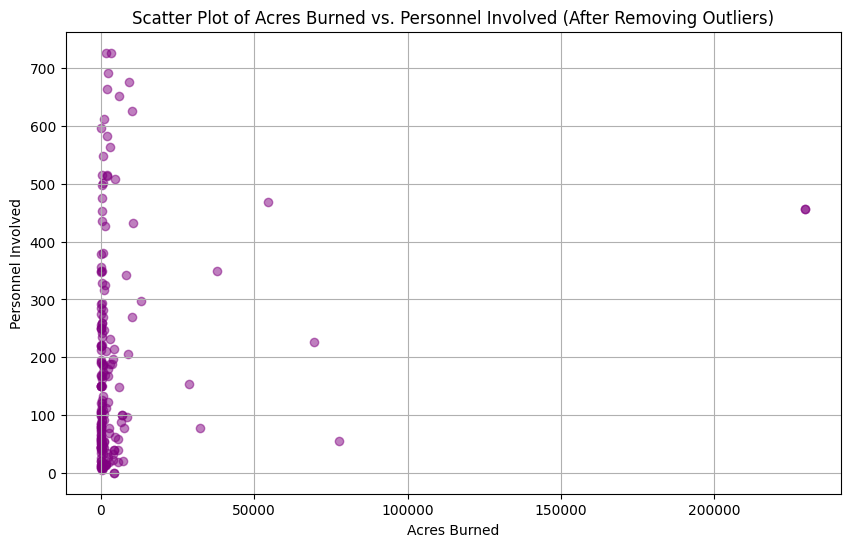

In [22]:
#Interquartile range filtering for the outliers and visualizing the relationship between acres burned and personnel involved

# Visualize the original scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df['AcresBurned'], df['PersonnelInvolved'], color='orange', alpha=0.5)
plt.title('Scatter Plot of Acres Burned vs. Personnel Involved (Before Removing Outliers)')
plt.xlabel('Acres Burned')
plt.ylabel('Personnel Involved')
plt.grid(True)
plt.show()

# Calculate the IQR for 'PersonnelInvolved'
Q1 = df['PersonnelInvolved'].quantile(0.25)
Q3 = df['PersonnelInvolved'].quantile(0.75)
IQR = Q3 - Q1

# Define the upper and lower bounds to identify outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify and remove outliers
df_no_outliers = df[(df['PersonnelInvolved'] >= lower_bound) & (df['PersonnelInvolved'] <= upper_bound)]

# Visualize the scatter plot after removing outliers
plt.figure(figsize=(10, 6))
plt.scatter(df_no_outliers['AcresBurned'], df_no_outliers['PersonnelInvolved'], color='purp', alpha=0.5)
plt.title('Scatter Plot of Acres Burned vs. Personnel Involved (After Removing Outliers)')
plt.xlabel('Acres Burned')
plt.ylabel('Personnel Involved')
plt.grid(True)
plt.show()

In [28]:
#Look at which counties were most effected and creating a heat map based on that


def get_county_statistics(county_name):
    county_data = df[df['Counties'] == county_name]

    if county_data.empty:
        return f"No data found for {county_name}."

    total_incidents = county_data.shape[0]
    total_acres_burned = county_data['AcresBurned'].sum()
    average_acres_burned = county_data['AcresBurned'].mean()

    return f"Statistics for {county_name}:\nTotal Incidents: {total_incidents}\nTotal Acres Burned: {total_acres_burned}\nAverage Acres Burned per Incident: {average_acres_burned:.2f}"

# Get user input
user_county = input("Enter the county name: ")

# Call the function and print the result
result = get_county_statistics(user_county)
print(result) 

Enter the county name: Monterey
Statistics for Monterey:
Total Incidents: 2
Total Acres Burned: 4962.0
Average Acres Burned per Incident: 2481.00
